***
## Table of Contents
<br>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;">1. HTTP</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. Loading Data </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. Feature Selection </h3></a>
            </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>C. Splitting Training and Test Data For Selected Features </h3></a>
           </ul>
        <ul>
            <a href='#1.D' style="text-decoration : none; color : #000000;"><h3>D. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#1.E' style="text-decoration : none; color : #000000;"><h3>E. Results </h3></a>
            </ul>
     </ol>
     <br>
      <ol>
        <h2><a href='#2' style="text-decoration : none; color : #000000;">2. HTTP with PCA</a></h2>
        <ul><a href='#2.A' style="text-decoration : none; color : #000000;"><h3>A. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#2.B' style="text-decoration : none; color : #000000;"><h3>B. Results </h3></a>
            </ul>
            <ul>
             <a href='#2.C' style="text-decoration : none; color : #000000;"><h3> C. % variance eplained by selected features</h3> </a> </ul>
     </ol>
<br>

<br>
    <ol>
        <h2><a href='#3' style="text-decoration : none; color : #000000;">3. HTTPS</a></h2>
        <ul>
            <a href='#3.A' style="text-decoration : none; color : #000000;"><h3>A. Loading Data </h3></a>
        </ul>
        <ul>
            <a href='#3.B' style="text-decoration : none; color : #000000;"><h3>B. Feature Selection </h3></a>
            </ul>
        <ul>
            <a href='#3.C' style="text-decoration : none; color : #000000;"><h3>C. Splitting Training and Test Data For Selected Features </h3></a>
           </ul>
        <ul>
            <a href='#3.D' style="text-decoration : none; color : #000000;"><h3>D. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#3.E' style="text-decoration : none; color : #000000;"><h3>E. Results </h3></a>
            </ul>
     </ol>
     <br>
      <ol>
        <h2><a href='#4' style="text-decoration : none; color : #000000;">4. HTTPS with PCA</a></h2>
        <ul><a href='#4.A' style="text-decoration : none; color : #000000;"><h3>A. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#4.B' style="text-decoration : none; color : #000000;"><h3>B. Results </h3></a>
            </ul>
            <ul>
             <a href='#4.C' style="text-decoration : none; color : #000000;"><h3> C. % variance eplained by selected features</h3> </a> </ul>
     </ol>
<br>

In [48]:
import pandas as pd
import numpy as np
import os
import json
from pandas.io.json import json_normalize
from IPython.display import display,clear_output,HTML
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate

import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',305)

from sklearn.feature_selection import SelectKBest,chi2,RFE,RFECV,f_regression,SelectFromModel
from sklearn.linear_model import LogisticRegression,RandomizedLasso,LinearRegression, Ridge,Lasso
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split,cross_val_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler,binarize
from sklearn.ensemble import RandomForestRegressor
from minepy import MINE
from sklearn import metrics

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve,recall_score
from sklearn import metrics
from pandas_ml import ConfusionMatrix


from imblearn.over_sampling import SMOTE

In [49]:
### Function get_params takes as input a grid search model and prints out the best parameters for the model and 
### prints the best accuracy of the model
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())

### The function takes as input the model, X and Y data to generate the confusion matrix  
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    return cm
 
### The get accuracy plot takes as input a dataframe and a string for the title of the plot and displays a plot
### The function is primarily for plotting of accuracies for various classifiers for the same split.
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

### Function grid takes as input an estimator, X_train,Y_Train,X_test and Y_test and a string represetning the name of the model
### We perform StratifiedKFold cross validation and grid search to hypertune the parameters of the model     
def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold,n_jobs=3,verbose=True)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    acc_train=accuracy_score(y,grid_search.predict(x))
    print("Accuracy of the ",model_name," model for the training data is:",acc_train)
    print("\nConfusion Matrix for Training data is:")
    cm_train=get_cm(grid_search,x,y)
    display(cm_train)
    acc_test=accuracy_score(y_test,grid_search.predict(x_test))
    print("Accuracy of the ",model_name," model for test data is:",acc_test)
    print("\nConfusion Matrix for test data is:")
    cm_test=get_cm(grid_search,x_test,y_test)
    display(cm_test)
    fpr, tpr, threshold = roc_curve(y_test, grid_search.predict(x_test))
    roc_auc =auc(fpr, tpr)
    return grid_search,cm_train,cm_test,acc_train,acc_test,roc_auc  

### Plot roc curve
def get_roc_curve(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy on test data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

def get_roc_curve_deep_learning(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy of Logistic Model on training data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

## <a id='1' style="text-decoration : none; color : #000000;"> HTTP</a>

### <a id='1.A' style="text-decoration : none; color : #000000;">A. Loading Data</a>

In [50]:
df_alex=pd.read_csv('Javascript_alexa_output_final_http.csv',low_memory=False)
df_virus=pd.read_csv('Javascript_malicious_output_final_http.csv',low_memory=False)

df_alex['Malicious']=0
df_virus['Malicious']=1

df=pd.concat([df_alex,df_virus])
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df = df.sample(frac=1,random_state=867).reset_index(drop=True)
df.fillna(value=0,inplace=True)
df=df[df['html_status']=='Success']


### Dropping columns that indicate the html status of domain data collection

df.drop(['html_status','html_status_strerror','html_status_message'],axis=1,inplace=True)
df.set_index(['domain'],inplace=True)


# df.to_csv('Javascript_dom.csv')

df.head()

df_non=df[df.Malicious==0]
df_mal=df[df.Malicious==1]

df_non=df_non.sample(frac=len(df_mal)/len(df_non),random_state=0)
df_u=df_non.append(df_mal)
df_u.Malicious.value_counts() 

X=df_u[['dom_function_window.setTimeout(','dom_function_window.setInterval(','dom_function_document.createElement(',
     'dom_function_document.write(','dom_function_document.createComment(','dom_function_document.createElementNS(',
      'dom_function_window.addEventListener(','js_function_escape(','js_function_unescape(','js_function_eval(','js_function_.concat(','js_function_.charCodeAt(',
   'js_function_String.fromCharCode(','js_function_.split(','js_function_Number.parseInt(','js_function_.replace(',
   'js_function_.link(','js_function_.exec(','js_function_.search(','js_function_.substring(','number_of_unsecure_cookies',
 'number_of_secure_cookies',
 'number_of_non_http_only_cookies',
 'number_of_http_only_cookies',
 'number_of_cookies']]

y=df_u.Malicious.values
feature_name = X.columns.tolist()
print("Shape after undersampling",df_u.shape)
df_u.head()

Shape after undersampling (12574, 407)


,dom_function_document.adoptNode(,dom_function_document.captureEvents(,dom_function_document.caretPositionFromPoint(,dom_function_document.caretRangeFromPoint(,dom_function_document.clear(,dom_function_document.close(,dom_function_document.createAttribute(,dom_function_document.createAttributeNS(,dom_function_document.createCDATASection(,dom_function_document.createComment(,dom_function_document.createDocumentFragment(,dom_function_document.createElement(,dom_function_document.createElementNS(,dom_function_document.createEntityReference(,dom_function_document.createEvent(,dom_function_document.createNodeIterator(,dom_function_document.createProcessingInstruction(,dom_function_document.createRange(,dom_function_document.createTextNode(,dom_function_document.createTouch(,dom_function_document.createTouchList(,dom_function_document.createTreeWalker(,dom_function_document.elementFromPoint(,dom_function_document.elementsFromPoint(,dom_function_document.enableStyleSheetsForSet(,dom_function_document.execCommand(,dom_function_document.exitPointerLock(,dom_function_document.getAnimations(,dom_function_document.getElementById(,dom_function_document.getElementByName(,dom_function_document.getElementsByClassName(,dom_function_document.getElementsByTagName(,dom_function_document.getElementsByTagNameNS(,dom_function_document.getSelection(,dom_function_document.hasFocus(,dom_function_document.importNode(,dom_function_document.normalizeDocument(,dom_function_document.open(,dom_function_document.queryCommandEnabled(,dom_function_document.queryCommandIndeterm(,dom_function_document.queryCommandValue(,dom_function_document.querySelector(,dom_function_document.querySelectorAll(,dom_function_document.releaseCapture(,dom_function_document.releaseEvent(,dom_function_document.routeEvent(,dom_function_document.write(,dom_function_document.writeln(,dom_function_window.addEventListener(,dom_function_window.alert(,dom_function_window.atob(,dom_function_window.back(,dom_function_window.blur(,dom_function_window.btoa(,dom_function_window.cancelAnimationFrame(,dom_function_window.cancelIdleCallback(,dom_function_window.captureEvents(,dom_function_window.clearImmediate(,dom_function_window.clearInterval(,dom_function_window.clearTimeout(,dom_function_window.close(,dom_function_window.confirm(,dom_function_window.createImageBitmap(,dom_function_window.disableExternalCapture(,dom_function_window.dispatchEvent(,dom_function_window.dump(,dom_function_window.enableExternalCapture(,dom_function_window.fetch(,dom_function_window.find(,dom_function_window.focus(,dom_function_window.forward(,dom_function_window.getAttention(,dom_function_window.getAttentionWithCycleCount(,dom_function_window.getComputedStyle(,dom_function_window.getDefaultComputedSyle(,dom_function_window.getSelection(,dom_function_window.home(,dom_function_window.matchMedia(,dom_function_window.maximize(,dom_function_window.minimize(,dom_function_window.moveBy(,dom_function_window.moveTo(,dom_function_window.open(,dom_function_window.openDialog(,dom_function_window.postMessage(,dom_function_window.print(,dom_function_window.prompt(,dom_function_window.releaseEvents(,dom_function_window.removeEventListener(,dom_function_window.requestAnimationFrame(,dom_function_window.requestIdleCallback(,dom_function_window.resizeBy(,dom_function_window.resizeTo(,dom_function_window.restore(,dom_function_window.routeEvent(,dom_function_window.scroll(,dom_function_window.scrollBy(,dom_function_window.scrollByLines(,dom_function_window.scrollByPages(,dom_function_window.scrollTo(,dom_function_window.setCursor(,dom_function_window.setImmediate(,dom_function_window.setInterval(,dom_function_window.setResizable(,dom_function_window.setTimeout(,dom_function_window.sizeToContent(,dom_function_window.stop(,dom_function_window.updateCommands(,js_function_.add(,js_function_.all(,js_function_.allTrue(,js_function_.anchor(,js_function_.apply(,js_function_.big(,js_function_.bind(,js_function_.blink(,js_function_.bold(,js_funct

### <a id='1.C' style="text-decoration : none; color : #000000;"> C. Splitting Training and Test Data For Selected Features </a>

In [51]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

X.shape

The train/test split ratio is 80:20


(12574, 25)

#### C.1 List of features selected

In [52]:
feature_name

['dom_function_window.setTimeout(',
 'dom_function_window.setInterval(',
 'dom_function_document.createElement(',
 'dom_function_document.write(',
 'dom_function_document.createComment(',
 'dom_function_document.createElementNS(',
 'dom_function_window.addEventListener(',
 'js_function_escape(',
 'js_function_unescape(',
 'js_function_eval(',
 'js_function_.concat(',
 'js_function_.charCodeAt(',
 'js_function_String.fromCharCode(',
 'js_function_.split(',
 'js_function_Number.parseInt(',
 'js_function_.replace(',
 'js_function_.link(',
 'js_function_.exec(',
 'js_function_.search(',
 'js_function_.substring(',
 'number_of_unsecure_cookies',
 'number_of_secure_cookies',
 'number_of_non_http_only_cookies',
 'number_of_http_only_cookies',
 'number_of_cookies']

### <a id='1.D' style="text-decoration : none; color : #000000;"> D. Classification using different methods </a>

In [53]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### D.1. Deep Learning

In [54]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.8810020876767467


Predicted  False  True  __all__
Actual                         
False       4227   829     5056
True         368  4635     5003
__all__     4595  5464    10059

The accuracy of the model on test data is: 0.882703777335984


Predicted  False  True  __all__
Actual                         
False       1024   207     1231
True          88  1196     1284
__all__     1112  1403     2515

#### D.2. KNN

In [55]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8889551645292773


Predicted  False  True  __all__
Actual                         
False       4258   798     5056
True         319  4684     5003
__all__     4577  5482    10059

The accuracy of the model on test data is: 0.8819085487077535


Predicted  False  True  __all__
Actual                         
False       1023   208     1231
True          89  1195     1284
__all__     1112  1403     2515

#### D.3. Logistics

In [56]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8509792225867382


Predicted  False  True  __all__
Actual                         
False       3955  1101     5056
True         398  4605     5003
__all__     4353  5706    10059

The accuracy of the model on test data is: 0.856858846918489


Predicted  False  True  __all__
Actual                         
False        958   273     1231
True          87  1197     1284
__all__     1045  1470     2515

#### D.4. Random Forest Classifier

In [57]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9010836067203499


Predicted  False  True  __all__
Actual                         
False       4361   695     5056
True         300  4703     5003
__all__     4661  5398    10059

The accuracy of the model on test data is: 0.8831013916500994


Predicted  False  True  __all__
Actual                         
False       1043   188     1231
True         106  1178     1284
__all__     1149  1366     2515

#### D.5. AdaBoost Classifier

In [58]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8709613281638334


Predicted  False  True  __all__
Actual                         
False       4330   726     5056
True         572  4431     5003
__all__     4902  5157    10059

The accuracy of the model on test data is: 0.8656063618290258


Predicted  False  True  __all__
Actual                         
False       1044   187     1231
True         151  1133     1284
__all__     1195  1320     2515

#### D.6. GradientBoosting Classifier

In [59]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.882195049209663


Predicted  False  True  __all__
Actual                         
False       4295   761     5056
True         424  4579     5003
__all__     4719  5340    10059

The accuracy of the model on test data is: 0.8803180914512923


Predicted  False  True  __all__
Actual                         
False       1040   191     1231
True         110  1174     1284
__all__     1150  1365     2515

#### D.7. Extra Tree Classifier

In [60]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9029724624714186


Predicted  False  True  __all__
Actual                         
False       4368   688     5056
True         288  4715     5003
__all__     4656  5403    10059

The accuracy of the model on test data is: 0.8834990059642147


Predicted  False  True  __all__
Actual                         
False       1043   188     1231
True         105  1179     1284
__all__     1148  1367     2515

#### D.8. Bagging Classifier

In [61]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9011830201809325


Predicted  False  True  __all__
Actual                         
False       4360   696     5056
True         298  4705     5003
__all__     4658  5401    10059

The accuracy of the model on test data is: 0.8815109343936381


Predicted  False  True  __all__
Actual                         
False       1038   193     1231
True         105  1179     1284
__all__     1143  1372     2515

#### D.9. Voting Classifier

In [62]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.8967094144547172


Predicted  False  True  __all__
Actual                         
False       4318   738     5056
True         301  4702     5003
__all__     4619  5440    10059

The accuracy of the model on test data is: 0.8846918489065606


Predicted  False  True  __all__
Actual                         
False       1035   196     1231
True          94  1190     1284
__all__     1129  1386     2515

### <a id='1.E' style="text-decoration : none; color : #000000;"> E. Results </a>

In [63]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.881002,4635.0,4227.0,829.0,368.0,0.163964,0.073556
KNeighborsClassifier,0.888955,4684.0,4258.0,798.0,319.0,0.157832,0.063762
LogisticRegression,0.850979,4605.0,3955.0,1101.0,398.0,0.217761,0.079552
RandomForestClassifier,0.901084,4703.0,4361.0,695.0,300.0,0.137460,0.059964
AdaBoostClassifier,0.870961,4431.0,4330.0,726.0,572.0,0.143592,0.114331
GradientBoostingClassifier,0.882195,4579.0,4295.0,761.0,424.0,0.150514,0.084749
ExtraTreeClassifier,0.902972,4715.0,4368.0,688.0,288.0,0.136076,0.057565
BaggingClassifier,0.901183,4705.0,4360.0,696.0,298.0,0.137658,0.059564
VotingClassifier,0.896709,4702.0,4318.0,738.0,301.0,0.145965,0.060164


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.882704,1196.0,1024.0,207.0,88.0,0.168156,0.068536,0.881654
KNeighborsClassifier,0.881909,1195.0,1023.0,208.0,89.0,0.168968,0.069315,0.880859
LogisticRegression,0.856859,1197.0,958.0,273.0,87.0,0.221771,0.067757,0.855236
RandomForestClassifier,0.883101,1178.0,1043.0,188.0,106.0,0.152721,0.082555,0.882362
AdaBoostClassifier,0.865606,1133.0,1044.0,187.0,151.0,0.151909,0.117601,0.865245
GradientBoostingClassifier,0.880318,1174.0,1040.0,191.0,110.0,0.155158,0.085670,0.879586
ExtraTreeClassifier,0.883499,1179.0,1043.0,188.0,105.0,0.152721,0.081776,0.882751
BaggingClassifier,0.881511,1179.0,1038.0,193.0,105.0,0.156783,0.081776,0.880721
VotingClassifier,0.884692,1190.0,1035.0,196.0,94.0,0.159220,0.073209,0.883786


## <a id='2' style="text-decoration : none; color : #000000;">2. HTTP with PCA</a>

#### <a id='2.A' style="text-decoration : none; color : #000000;"> A. Classification using different methods</a>

In [64]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

In [65]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
pca=PCA(n_components=18,random_state=0)
X_pca=pca.fit_transform(scaled_X)
print(sum(pca.explained_variance_ratio_))
print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,y,random_state=0,test_size=0.2)

X_pca.shape

0.925420403552496
The train/test split ratio is 80:20


(12574, 18)

#### A.1. Deep Learning

In [66]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X_pca.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.8777214434775221


Predicted  False  True  __all__
Actual                         
False       4232   824     5056
True         406  4597     5003
__all__     4638  5421    10059

The accuracy of the model on test data is: 0.8795228628230616


Predicted  False  True  __all__
Actual                         
False       1025   206     1231
True          97  1187     1284
__all__     1122  1393     2515

#### A.2. KNN

In [67]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8888557510686947


Predicted  False  True  __all__
Actual                         
False       4313   743     5056
True         375  4628     5003
__all__     4688  5371    10059

The accuracy of the model on test data is: 0.882703777335984


Predicted  False  True  __all__
Actual                         
False       1045   186     1231
True         109  1175     1284
__all__     1154  1361     2515

#### A.3. Logistics

In [68]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.850581568744408


Predicted  False  True  __all__
Actual                         
False       3954  1102     5056
True         401  4602     5003
__all__     4355  5704    10059

The accuracy of the model on test data is: 0.856858846918489


Predicted  False  True  __all__
Actual                         
False        959   272     1231
True          88  1196     1284
__all__     1047  1468     2515

#### A.4. Random Forest Classifier

In [69]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9011830201809325


Predicted  False  True  __all__
Actual                         
False       4362   694     5056
True         300  4703     5003
__all__     4662  5397    10059

The accuracy of the model on test data is: 0.8846918489065606


Predicted  False  True  __all__
Actual                         
False       1046   185     1231
True         105  1179     1284
__all__     1151  1364     2515

#### A.5. AdaBoost Classifier

In [70]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8773237896411175


Predicted  False  True  __all__
Actual                         
False       4217   839     5056
True         395  4608     5003
__all__     4612  5447    10059

The accuracy of the model on test data is: 0.8795228628230616


Predicted  False  True  __all__
Actual                         
False       1024   207     1231
True          96  1188     1284
__all__     1120  1395     2515

#### A.6. GradientBoosting Classifier

In [71]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8919375683467542


Predicted  False  True  __all__
Actual                         
False       4365   691     5056
True         396  4607     5003
__all__     4761  5298    10059

The accuracy of the model on test data is: 0.8831013916500994


Predicted  False  True  __all__
Actual                         
False       1050   181     1231
True         113  1171     1284
__all__     1163  1352     2515

#### A.7. Extra Tree Classifier

In [72]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9029724624714186


Predicted  False  True  __all__
Actual                         
False       4368   688     5056
True         288  4715     5003
__all__     4656  5403    10059

The accuracy of the model on test data is: 0.88389662027833


Predicted  False  True  __all__
Actual                         
False       1042   189     1231
True         103  1181     1284
__all__     1145  1370     2515

#### A.8. Bagging Classifier

In [73]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9009841932597674


Predicted  False  True  __all__
Actual                         
False       4359   697     5056
True         299  4704     5003
__all__     4658  5401    10059

The accuracy of the model on test data is: 0.8823061630218688


Predicted  False  True  __all__
Actual                         
False       1042   189     1231
True         107  1177     1284
__all__     1149  1366     2515

#### A.9. Voting Classifier

In [74]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.8982006163634556


Predicted  False  True  __all__
Actual                         
False       4366   690     5056
True         334  4669     5003
__all__     4700  5359    10059

The accuracy of the model on test data is: 0.8850894632206759


Predicted  False  True  __all__
Actual                         
False       1050   181     1231
True         108  1176     1284
__all__     1158  1357     2515

### <a id='2.B' style="text-decoration : none; color : #000000;"> B. Results </a>

In [75]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.877721,4597.0,4232.0,824.0,406.0,0.162975,0.081151
KNeighborsClassifier,0.888856,4628.0,4313.0,743.0,375.0,0.146954,0.074955
LogisticRegression,0.850582,4602.0,3954.0,1102.0,401.0,0.217959,0.080152
RandomForestClassifier,0.901183,4703.0,4362.0,694.0,300.0,0.137263,0.059964
AdaBoostClassifier,0.877324,4608.0,4217.0,839.0,395.0,0.165941,0.078953
GradientBoostingClassifier,0.891938,4607.0,4365.0,691.0,396.0,0.136669,0.079153
ExtraTreeClassifier,0.902972,4715.0,4368.0,688.0,288.0,0.136076,0.057565
BaggingClassifier,0.900984,4704.0,4359.0,697.0,299.0,0.137856,0.059764
VotingClassifier,0.898201,4669.0,4366.0,690.0,334.0,0.136472,0.066760


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.879523,1187.0,1025.0,206.0,97.0,0.167344,0.075545,0.878556
KNeighborsClassifier,0.882704,1175.0,1045.0,186.0,109.0,0.151097,0.084891,0.882006
LogisticRegression,0.856859,1196.0,959.0,272.0,88.0,0.220959,0.068536,0.855253
RandomForestClassifier,0.884692,1179.0,1046.0,185.0,105.0,0.150284,0.081776,0.883970
AdaBoostClassifier,0.879523,1188.0,1024.0,207.0,96.0,0.168156,0.074766,0.878539
GradientBoostingClassifier,0.883101,1171.0,1050.0,181.0,113.0,0.147035,0.088006,0.882479
ExtraTreeClassifier,0.883897,1181.0,1042.0,189.0,103.0,0.153534,0.080218,0.883124
BaggingClassifier,0.882306,1177.0,1042.0,189.0,107.0,0.153534,0.083333,0.881566
VotingClassifier,0.885089,1176.0,1050.0,181.0,108.0,0.147035,0.084112,0.884426


### <a id='2.C' style="text-decoration : none; color : #000000;"> C. % variance eplained by selected features </a> 

In [76]:
pca_inv_data = pca.components_
lst=[]
lst.append((np.square(pca_inv_data.std(axis=0)),X.columns))
pca_df=pd.DataFrame(np.square(pca_inv_data.std(axis=0)))
pca_df['features']=X.columns
pca_df.columns=['% Variance explained by each feature','Features']
pca_df['% Variance explained by each feature']=pca_df['% Variance explained by each feature']
pca_df.sort_values(by='% Variance explained by each feature',ascending=False,inplace=True)
pca_df

,% Variance explained by each feature,Features
3,0.055443,dom_function_document.write(
6,0.055196,dom_function_window.addEventListener(
1,0.054944,dom_function_window.setInterval(
0,0.054595,dom_function_window.setTimeout(
9,0.054311,js_function_eval(
18,0.053264,js_function_.search(
2,0.048722,dom_function_document.createElement(
11,0.048436,js_function_.charCodeAt(
12,0.047394,js_function_String.fromCharCode(
14,0.045303,js_function_Number.parseInt(


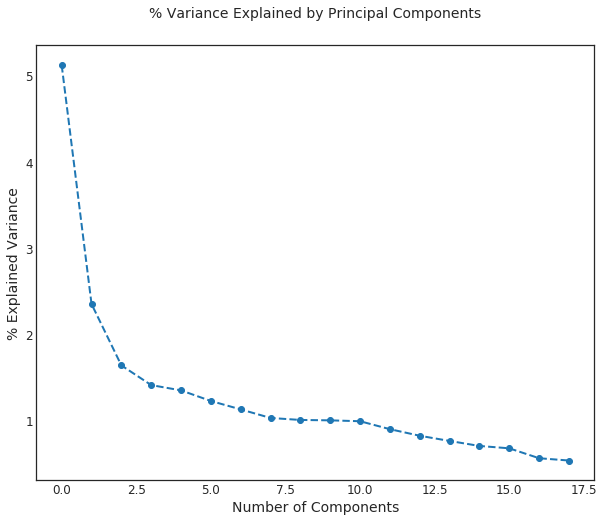

In [77]:
sns.set_style('white')
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


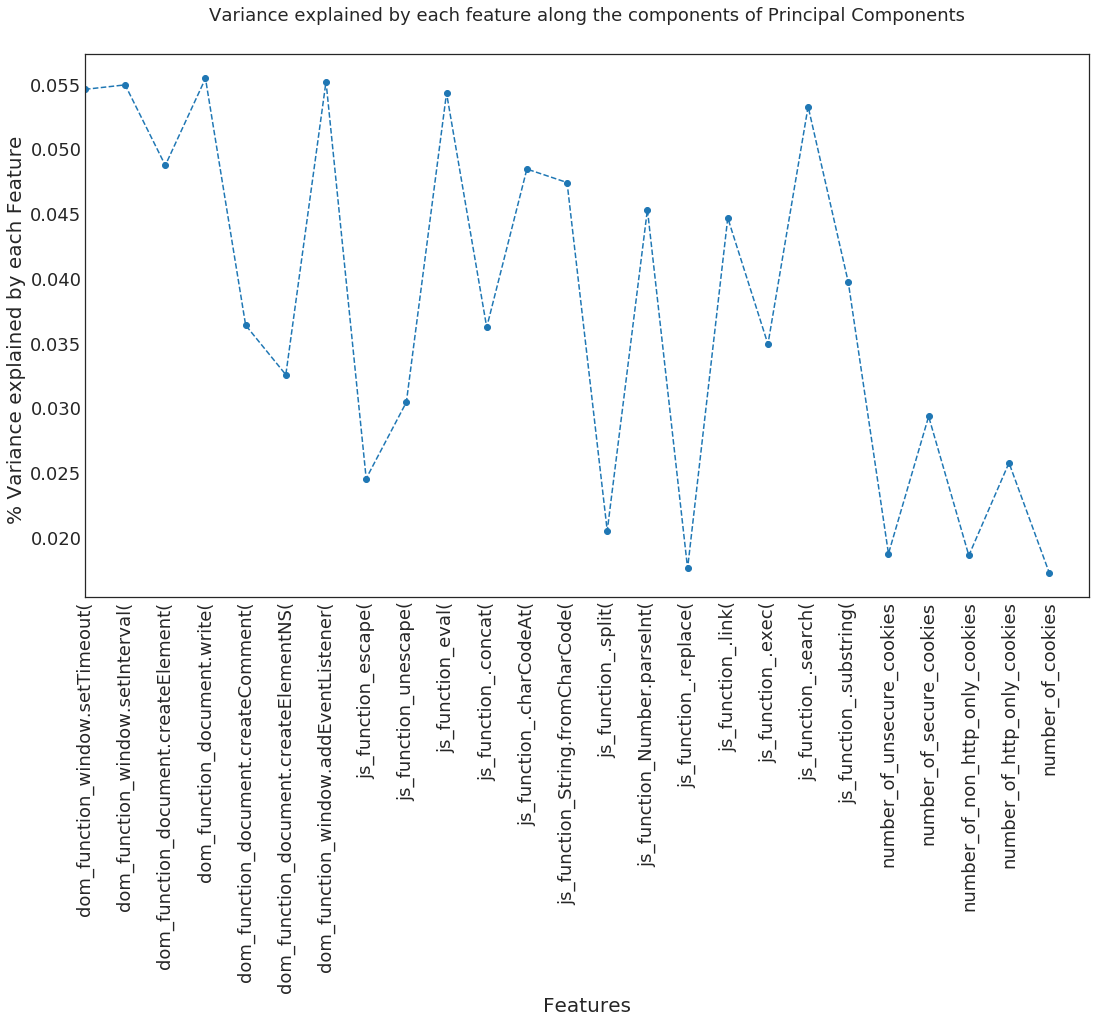

In [78]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, X.shape[1]])
plt.xticks(np.arange(X.shape[1]),feature_name,rotation=90)
plt.title('Variance explained by each feature along the components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

## <a id='3' style="text-decoration : none; color : #000000;"> HTTPS</a>

### <a id='3.A' style="text-decoration : none; color : #000000;">A. Loading Data</a>

In [79]:
df_alex=pd.read_csv('Javascript_alexa_output_final_https.csv',low_memory=False)
df_virus=pd.read_csv('Javascript_malicious_output_final_https.csv',low_memory=False)

df_alex['Malicious']=0
df_virus['Malicious']=1

df=pd.concat([df_alex,df_virus])
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df = df.sample(frac=1,random_state=867).reset_index(drop=True)
df.fillna(value=0,inplace=True)
df=df[df['html_status']=='Success']


### Dropping columns that indicate the html status of domain data collection

df.drop(['html_status','html_status_strerror','html_status_message'],axis=1,inplace=True)
df.set_index(['domain'],inplace=True)

df_non=df[df.Malicious==0]
df_mal=df[df.Malicious==1]

df_non=df_non.sample(frac=len(df_mal)/len(df_non),random_state=0)
df_u=df_non.append(df_mal)
df_u.Malicious.value_counts() 
X=df_u[['dom_function_window.setTimeout(','dom_function_window.setInterval(','dom_function_document.createElement(',
     'dom_function_document.write(','dom_function_document.createComment(','dom_function_document.createElementNS(',
      'dom_function_window.addEventListener(','js_function_escape(','js_function_unescape(','js_function_eval(','js_function_.concat(','js_function_.charCodeAt(',
   'js_function_String.fromCharCode(','js_function_.split(','js_function_Number.parseInt(','js_function_.replace(',
   'js_function_.link(','js_function_.exec(','js_function_.search(','js_function_.substring(','number_of_unsecure_cookies',
 'number_of_secure_cookies',
 'number_of_non_http_only_cookies',
 'number_of_http_only_cookies',
 'number_of_cookies']]


y=df_u.Malicious.values
feature_name = X.columns.tolist()
print("Shape after undersampling",df_u.shape)
df_u.head()

Shape after undersampling (12714, 407)


,dom_function_document.adoptNode(,dom_function_document.captureEvents(,dom_function_document.caretPositionFromPoint(,dom_function_document.caretRangeFromPoint(,dom_function_document.clear(,dom_function_document.close(,dom_function_document.createAttribute(,dom_function_document.createAttributeNS(,dom_function_document.createCDATASection(,dom_function_document.createComment(,dom_function_document.createDocumentFragment(,dom_function_document.createElement(,dom_function_document.createElementNS(,dom_function_document.createEntityReference(,dom_function_document.createEvent(,dom_function_document.createNodeIterator(,dom_function_document.createProcessingInstruction(,dom_function_document.createRange(,dom_function_document.createTextNode(,dom_function_document.createTouch(,dom_function_document.createTouchList(,dom_function_document.createTreeWalker(,dom_function_document.elementFromPoint(,dom_function_document.elementsFromPoint(,dom_function_document.enableStyleSheetsForSet(,dom_function_document.execCommand(,dom_function_document.exitPointerLock(,dom_function_document.getAnimations(,dom_function_document.getElementById(,dom_function_document.getElementByName(,dom_function_document.getElementsByClassName(,dom_function_document.getElementsByTagName(,dom_function_document.getElementsByTagNameNS(,dom_function_document.getSelection(,dom_function_document.hasFocus(,dom_function_document.importNode(,dom_function_document.normalizeDocument(,dom_function_document.open(,dom_function_document.queryCommandEnabled(,dom_function_document.queryCommandIndeterm(,dom_function_document.queryCommandValue(,dom_function_document.querySelector(,dom_function_document.querySelectorAll(,dom_function_document.releaseCapture(,dom_function_document.releaseEvent(,dom_function_document.routeEvent(,dom_function_document.write(,dom_function_document.writeln(,dom_function_window.addEventListener(,dom_function_window.alert(,dom_function_window.atob(,dom_function_window.back(,dom_function_window.blur(,dom_function_window.btoa(,dom_function_window.cancelAnimationFrame(,dom_function_window.cancelIdleCallback(,dom_function_window.captureEvents(,dom_function_window.clearImmediate(,dom_function_window.clearInterval(,dom_function_window.clearTimeout(,dom_function_window.close(,dom_function_window.confirm(,dom_function_window.createImageBitmap(,dom_function_window.disableExternalCapture(,dom_function_window.dispatchEvent(,dom_function_window.dump(,dom_function_window.enableExternalCapture(,dom_function_window.fetch(,dom_function_window.find(,dom_function_window.focus(,dom_function_window.forward(,dom_function_window.getAttention(,dom_function_window.getAttentionWithCycleCount(,dom_function_window.getComputedStyle(,dom_function_window.getDefaultComputedSyle(,dom_function_window.getSelection(,dom_function_window.home(,dom_function_window.matchMedia(,dom_function_window.maximize(,dom_function_window.minimize(,dom_function_window.moveBy(,dom_function_window.moveTo(,dom_function_window.open(,dom_function_window.openDialog(,dom_function_window.postMessage(,dom_function_window.print(,dom_function_window.prompt(,dom_function_window.releaseEvents(,dom_function_window.removeEventListener(,dom_function_window.requestAnimationFrame(,dom_function_window.requestIdleCallback(,dom_function_window.resizeBy(,dom_function_window.resizeTo(,dom_function_window.restore(,dom_function_window.routeEvent(,dom_function_window.scroll(,dom_function_window.scrollBy(,dom_function_window.scrollByLines(,dom_function_window.scrollByPages(,dom_function_window.scrollTo(,dom_function_window.setCursor(,dom_function_window.setImmediate(,dom_function_window.setInterval(,dom_function_window.setResizable(,dom_function_window.setTimeout(,dom_function_window.sizeToContent(,dom_function_window.stop(,dom_function_window.updateCommands(,js_function_.add(,js_function_.all(,js_function_.allTrue(,js_function_.anchor(,js_function_.apply(,js_function_.big(,js_function_.bind(,js_function_.blink(,js_function_.bold(,js_funct

### <a id='3.C' style="text-decoration : none; color : #000000;"> C. Splitting Training and Test Data For Selected Features </a>

In [80]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

X.shape

The train/test split ratio is 80:20


(12714, 25)

#### C.1 List of features selected

In [81]:
feature_name

['dom_function_window.setTimeout(',
 'dom_function_window.setInterval(',
 'dom_function_document.createElement(',
 'dom_function_document.write(',
 'dom_function_document.createComment(',
 'dom_function_document.createElementNS(',
 'dom_function_window.addEventListener(',
 'js_function_escape(',
 'js_function_unescape(',
 'js_function_eval(',
 'js_function_.concat(',
 'js_function_.charCodeAt(',
 'js_function_String.fromCharCode(',
 'js_function_.split(',
 'js_function_Number.parseInt(',
 'js_function_.replace(',
 'js_function_.link(',
 'js_function_.exec(',
 'js_function_.search(',
 'js_function_.substring(',
 'number_of_unsecure_cookies',
 'number_of_secure_cookies',
 'number_of_non_http_only_cookies',
 'number_of_http_only_cookies',
 'number_of_cookies']

### <a id='3.D' style="text-decoration : none; color : #000000;"> D. Classification using different methods </a>

In [82]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### D.1. Deep Learning

In [83]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.8103431324529362


Predicted  False  True  __all__
Actual                         
False       3321  1809     5130
True         120  4921     5041
__all__     3441  6730    10171

The accuracy of the model on test data is: 0.8073141958316948


Predicted  False  True  __all__
Actual                         
False        774   453     1227
True          37  1279     1316
__all__      811  1732     2543

#### D.2. KNN

In [84]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8152590699046308


Predicted  False  True  __all__
Actual                         
False       3461  1669     5130
True         210  4831     5041
__all__     3671  6500    10171

The accuracy of the model on test data is: 0.8100668501769563


Predicted  False  True  __all__
Actual                         
False        811   416     1227
True          67  1249     1316
__all__      878  1665     2543

#### D.3. Logistics

In [85]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.804444007472225


Predicted  False  True  __all__
Actual                         
False       3324  1806     5130
True         183  4858     5041
__all__     3507  6664    10171

The accuracy of the model on test data is: 0.7982697601258356


Predicted  False  True  __all__
Actual                         
False        772   455     1227
True          58  1258     1316
__all__      830  1713     2543

#### D.4. Random Forest Classifier

In [86]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8232228886048569


Predicted  False  True  __all__
Actual                         
False       3419  1711     5130
True          87  4954     5041
__all__     3506  6665    10171

The accuracy of the model on test data is: 0.8104600865119937


Predicted  False  True  __all__
Actual                         
False        788   439     1227
True          43  1273     1316
__all__      831  1712     2543

#### D.5. AdaBoost Classifier

In [87]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8105397699341265


Predicted  False  True  __all__
Actual                         
False       3487  1643     5130
True         284  4757     5041
__all__     3771  6400    10171

The accuracy of the model on test data is: 0.8065277231616201


Predicted  False  True  __all__
Actual                         
False        814   413     1227
True          79  1237     1316
__all__      893  1650     2543

#### D.6. GradientBoosting Classifier

In [88]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8161439386491004


Predicted  False  True  __all__
Actual                         
False       3466  1664     5130
True         206  4835     5041
__all__     3672  6499    10171

The accuracy of the model on test data is: 0.8088871411718442


Predicted  False  True  __all__
Actual                         
False        809   418     1227
True          68  1248     1316
__all__      877  1666     2543

#### D.7. Extra Tree Classifier

In [89]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8243043948480975


Predicted  False  True  __all__
Actual                         
False       3423  1707     5130
True          80  4961     5041
__all__     3503  6668    10171

The accuracy of the model on test data is: 0.8104600865119937


Predicted  False  True  __all__
Actual                         
False        787   440     1227
True          42  1274     1316
__all__      829  1714     2543

#### D.8. Bagging Classifier

In [90]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8231245698554714


Predicted  False  True  __all__
Actual                         
False       3417  1713     5130
True          86  4955     5041
__all__     3503  6668    10171

The accuracy of the model on test data is: 0.8081006685017695


Predicted  False  True  __all__
Actual                         
False        779   448     1227
True          40  1276     1316
__all__      819  1724     2543

#### D.9. Voting Classifier

In [91]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.8188968636318946


Predicted  False  True  __all__
Actual                         
False       3444  1686     5130
True         156  4885     5041
__all__     3600  6571    10171

The accuracy of the model on test data is: 0.8073141958316948


Predicted  False  True  __all__
Actual                         
False        795   432     1227
True          58  1258     1316
__all__      853  1690     2543

### <a id='3.E' style="text-decoration : none; color : #000000;"> E. Results </a>

In [92]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.810343,4921.0,3321.0,1809.0,120.0,0.352632,0.023805
KNeighborsClassifier,0.815259,4831.0,3461.0,1669.0,210.0,0.325341,0.041658
LogisticRegression,0.804444,4858.0,3324.0,1806.0,183.0,0.352047,0.036302
RandomForestClassifier,0.823223,4954.0,3419.0,1711.0,87.0,0.333528,0.017258
AdaBoostClassifier,0.810540,4757.0,3487.0,1643.0,284.0,0.320273,0.056338
GradientBoostingClassifier,0.816144,4835.0,3466.0,1664.0,206.0,0.324366,0.040865
ExtraTreeClassifier,0.824304,4961.0,3423.0,1707.0,80.0,0.332749,0.015870
BaggingClassifier,0.823125,4955.0,3417.0,1713.0,86.0,0.333918,0.017060
VotingClassifier,0.818897,4885.0,3444.0,1686.0,156.0,0.328655,0.030946


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.807314,1279.0,774.0,453.0,37.0,0.369193,0.028116,0.801346
KNeighborsClassifier,0.810067,1249.0,811.0,416.0,67.0,0.339038,0.050912,0.805025
LogisticRegression,0.798270,1258.0,772.0,455.0,58.0,0.370823,0.044073,0.792552
RandomForestClassifier,0.810460,1273.0,788.0,439.0,43.0,0.357783,0.032675,0.804771
AdaBoostClassifier,0.806528,1237.0,814.0,413.0,79.0,0.336593,0.060030,0.801688
GradientBoostingClassifier,0.808887,1248.0,809.0,418.0,68.0,0.340668,0.051672,0.803830
ExtraTreeClassifier,0.810460,1274.0,787.0,440.0,42.0,0.358598,0.031915,0.804743
BaggingClassifier,0.808101,1276.0,779.0,448.0,40.0,0.365118,0.030395,0.802243
VotingClassifier,0.807314,1258.0,795.0,432.0,58.0,0.352078,0.044073,0.801924


## <a id='4' style="text-decoration : none; color : #000000;">4. HTTPS with PCA</a>

#### <a id='4.A' style="text-decoration : none; color : #000000;"> A. Classification using different methods</a>

In [93]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

In [94]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
pca=PCA(n_components=18,random_state=0)
X_pca=pca.fit_transform(scaled_X)
print(sum(pca.explained_variance_ratio_))
print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,y,random_state=0,test_size=0.2)

X_pca.shape

0.9354360980657623
The train/test split ratio is 80:20


(12714, 18)

#### A.1. Deep Learning

In [95]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X_train.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.8134893323746699


Predicted  False  True  __all__
Actual                         
False       3403  1727     5130
True         170  4871     5041
__all__     3573  6598    10171

The accuracy of the model on test data is: 0.8049547778214707


Predicted  False  True  __all__
Actual                         
False        787   440     1227
True          56  1260     1316
__all__      843  1700     2543

#### A.2. KNN

In [96]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8171271261429555


Predicted  False  True  __all__
Actual                         
False       3419  1711     5130
True         149  4892     5041
__all__     3568  6603    10171

The accuracy of the model on test data is: 0.8124262681871804


Predicted  False  True  __all__
Actual                         
False        791   436     1227
True          41  1275     1316
__all__      832  1711     2543

#### A.3. Logistics

In [97]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.804640644970996


Predicted  False  True  __all__
Actual                         
False       3325  1805     5130
True         182  4859     5041
__all__     3507  6664    10171

The accuracy of the model on test data is: 0.7982697601258356


Predicted  False  True  __all__
Actual                         
False        772   455     1227
True          58  1258     1316
__all__      830  1713     2543

#### A.4. Random Forest Classifier

In [98]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.823026251106086


Predicted  False  True  __all__
Actual                         
False       3419  1711     5130
True          89  4952     5041
__all__     3508  6663    10171

The accuracy of the model on test data is: 0.8124262681871804


Predicted  False  True  __all__
Actual                         
False        793   434     1227
True          43  1273     1316
__all__      836  1707     2543

#### A.5. AdaBoost Classifier

In [99]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8138826074132337


Predicted  False  True  __all__
Actual                         
False       3418  1712     5130
True         181  4860     5041
__all__     3599  6572    10171

The accuracy of the model on test data is: 0.8073141958316948


Predicted  False  True  __all__
Actual                         
False        791   436     1227
True          54  1262     1316
__all__      845  1698     2543

#### A.6. GradientBoosting Classifier

In [100]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8190935011306656


Predicted  False  True  __all__
Actual                         
False       3421  1709     5130
True         131  4910     5041
__all__     3552  6619    10171

The accuracy of the model on test data is: 0.81399921352733


Predicted  False  True  __all__
Actual                         
False        794   433     1227
True          40  1276     1316
__all__      834  1709     2543

#### A.7. Extra Tree Classifier

In [101]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8243043948480975


Predicted  False  True  __all__
Actual                         
False       3423  1707     5130
True          80  4961     5041
__all__     3503  6668    10171

The accuracy of the model on test data is: 0.8100668501769563


Predicted  False  True  __all__
Actual                         
False        788   439     1227
True          44  1272     1316
__all__      832  1711     2543

#### A.8. Bagging Classifier

In [102]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.823026251106086


Predicted  False  True  __all__
Actual                         
False       3416  1714     5130
True          86  4955     5041
__all__     3502  6669    10171

The accuracy of the model on test data is: 0.8112465591820684


Predicted  False  True  __all__
Actual                         
False        787   440     1227
True          40  1276     1316
__all__      827  1716     2543

#### A.9. Voting Classifier

In [103]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.8213548323665323


Predicted  False  True  __all__
Actual                         
False       3420  1710     5130
True         107  4934     5041
__all__     3527  6644    10171

The accuracy of the model on test data is: 0.8136059771922926


Predicted  False  True  __all__
Actual                         
False        792   435     1227
True          39  1277     1316
__all__      831  1712     2543

### <a id='4.B' style="text-decoration : none; color : #000000;"> B. Results </a>

In [104]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.813489,4871.0,3403.0,1727.0,170.0,0.336647,0.033723
KNeighborsClassifier,0.817127,4892.0,3419.0,1711.0,149.0,0.333528,0.029558
LogisticRegression,0.804641,4859.0,3325.0,1805.0,182.0,0.351852,0.036104
RandomForestClassifier,0.823026,4952.0,3419.0,1711.0,89.0,0.333528,0.017655
AdaBoostClassifier,0.813883,4860.0,3418.0,1712.0,181.0,0.333723,0.035906
GradientBoostingClassifier,0.819094,4910.0,3421.0,1709.0,131.0,0.333138,0.025987
ExtraTreeClassifier,0.824304,4961.0,3423.0,1707.0,80.0,0.332749,0.015870
BaggingClassifier,0.823026,4955.0,3416.0,1714.0,86.0,0.334113,0.017060
VotingClassifier,0.821355,4934.0,3420.0,1710.0,107.0,0.333333,0.021226


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.804955,1260.0,787.0,440.0,56.0,0.358598,0.042553,0.799424
KNeighborsClassifier,0.812426,1275.0,791.0,436.0,41.0,0.355338,0.031155,0.806753
LogisticRegression,0.798270,1258.0,772.0,455.0,58.0,0.370823,0.044073,0.792552
RandomForestClassifier,0.812426,1273.0,793.0,434.0,43.0,0.353708,0.032675,0.806808
AdaBoostClassifier,0.807314,1262.0,791.0,436.0,54.0,0.355338,0.041033,0.801814
GradientBoostingClassifier,0.813999,1276.0,794.0,433.0,40.0,0.352893,0.030395,0.808356
ExtraTreeClassifier,0.810067,1272.0,788.0,439.0,44.0,0.357783,0.033435,0.804391
BaggingClassifier,0.811247,1276.0,787.0,440.0,40.0,0.358598,0.030395,0.805503
VotingClassifier,0.813606,1277.0,792.0,435.0,39.0,0.354523,0.029635,0.807921


### <a id='4.C' style="text-decoration : none; color : #000000;"> C. % variance eplained by selected features </a> 

In [105]:
pca_inv_data = pca.components_
lst=[]
lst.append((np.square(pca_inv_data.std(axis=0)),X.columns))
pca_df=pd.DataFrame(np.square(pca_inv_data.std(axis=0)))
pca_df['features']=X.columns
pca_df.columns=['% Variance explained by each feature','Features']
pca_df['% Variance explained by each feature']=pca_df['% Variance explained by each feature']
pca_df.sort_values(by='% Variance explained by each feature',ascending=False,inplace=True)
pca_df

,% Variance explained by each feature,Features
12,5.484679e-02,js_function_String.fromCharCode(
1,5.479803e-02,dom_function_window.setInterval(
9,5.397990e-02,js_function_eval(
0,5.370379e-02,dom_function_window.setTimeout(
11,5.347234e-02,js_function_.charCodeAt(
6,5.259729e-02,dom_function_window.addEventListener(
2,5.083146e-02,dom_function_document.createElement(
16,5.044333e-02,js_function_.link(
17,4.928173e-02,js_function_.exec(
18,4.885198e-02,js_function_.search(


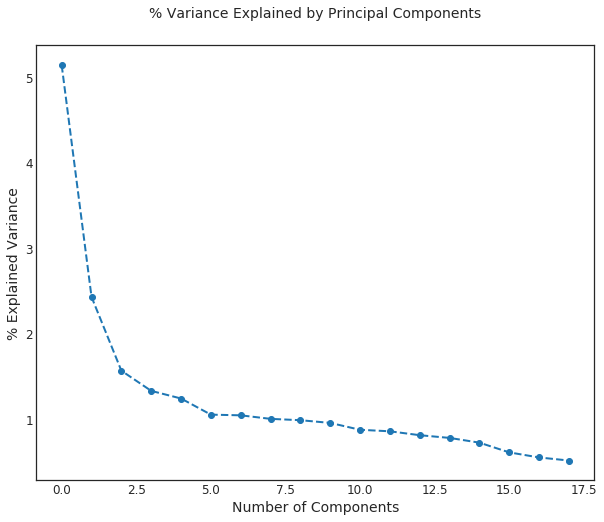

In [106]:
sns.set_style('white')
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


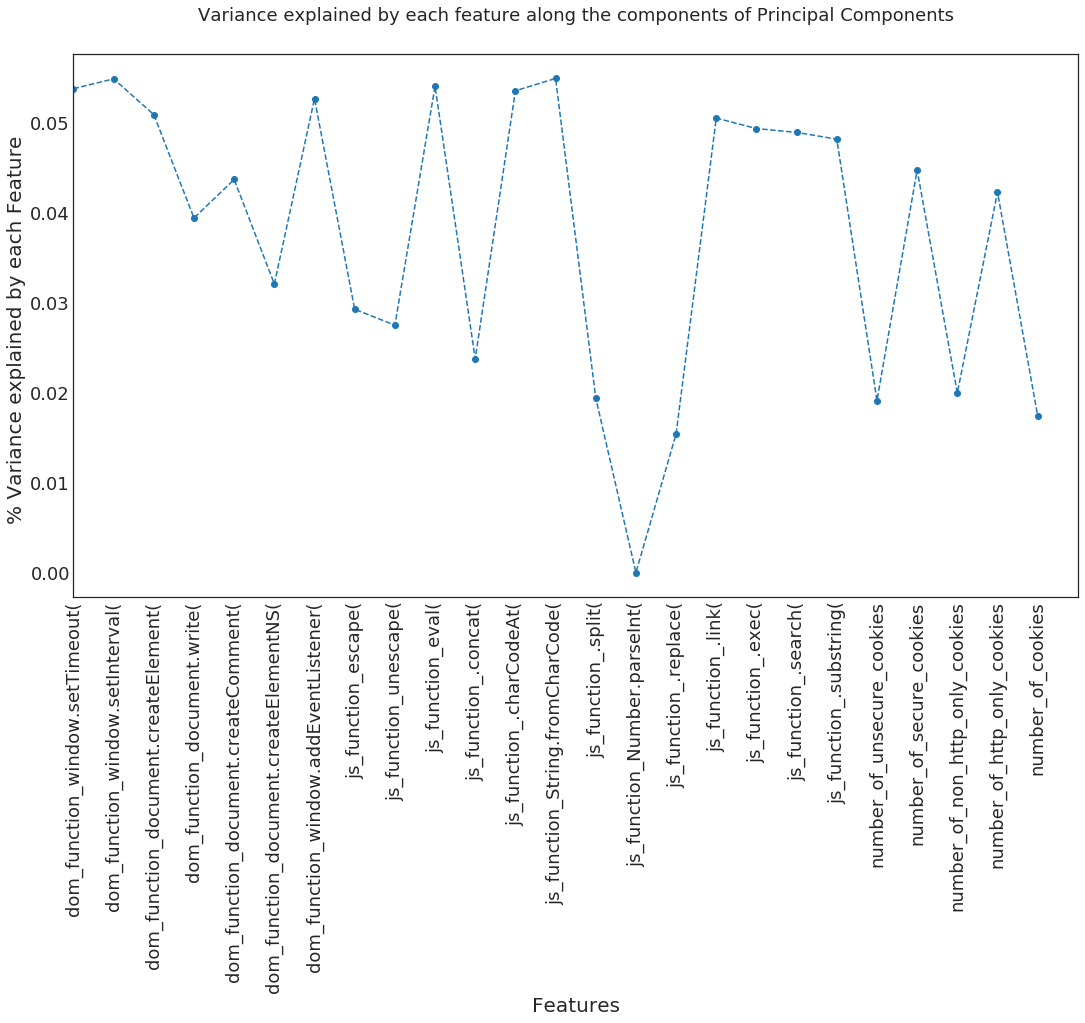

In [107]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, X.shape[1]])
plt.xticks(np.arange(X.shape[1]),feature_name,rotation=90)
plt.title('Variance explained by each feature along the components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

In [108]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')